## imports

In [223]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import single, complete, average, ward, dendrogram,fcluster
from datetime import date,datetime,timedelta
import matplotlib.pyplot as plt

# Data preperation 

In [224]:
df =  pd.read_csv("consumption_loadcourse_excl_Linz.csv")

/Users/tamo/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [225]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["day_of_year"] = df["datetime"].apply(lambda x: x.timetuple().tm_yday)

In [227]:
#filtering out all rows with zero values for Electricity_Demand
df = df[df["Electricity_Demand"] != 0]

In [229]:
#normalisation:
df['max_energy'] = df.groupby(['Fall_ge1'])['Electricity_Demand'].transform(max)
df['norm_energy'] = df['Electricity_Demand'] / df['max_energy']

In [230]:
#Meteorological seasons:
#winter
sdate_wi = date(2009, 12, 1)   # start date
edate_wi = date(2010, 2, 28)   # end date
#spring
sdate_sp = date(2010, 3, 1)   # start date
edate_sp = date(2010, 5, 31)   # end date
#summer
sdate_su = date(2010, 6, 1)   # start date
edate_su = date(2010, 8, 31)   # end date
#Fall
sdate_fa = date(2009, 9, 1)   # start date
edate_fa = date(2009, 11, 30)   # end date

In [231]:
#filter df by season:
df_fa = df[(df["datetime"] > str(sdate_fa)) & (df["datetime"] <= str(edate_fa))]
df_wi = df[(df["datetime"] > str(sdate_wi)) & (df["datetime"] <= str(edate_wi))]
df_sp = df[(df["datetime"] > str(sdate_sp)) & (df["datetime"] <= str(edate_sp))]
df_su = df[(df["datetime"] > str(sdate_su)) & (df["datetime"] <= str(edate_su))]

In [232]:
#split dataframes into weekday and weekend days
df_fa_week=df_fa[df_fa["Weekday"]==1]
df_fa_wknd=df_fa[df_fa["Weekday"]==2]
df_wi_week=df_wi[df_wi["Weekday"]==1]
df_wi_wknd=df_wi[df_wi["Weekday"]==2]
df_sp_week=df_sp[df_sp["Weekday"]==1]
df_sp_wknd=df_sp[df_sp["Weekday"]==2]
df_su_week=df_su[df_su["Weekday"]==1]
df_su_wknd=df_su[df_su["Weekday"]==2]

In [233]:
df_fa_week.shape

(650421, 16)

In [234]:
df_fa_wknd.shape

(267064, 16)

# Function for hierarchical clustering 

In [235]:
#funktion for clustering, select method and plot of dendrogram
def hierarchical_clustering(dist_mat, method='ward'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

# Fall

## Fall weekdays 

In [236]:
#create numpy array with mean for every hour of each ID as columns
red_df=df_fa_week[["Fall_ge1","day_of_year","Hour_of_Day","Electricity_Demand"]]
piv_df = pd.pivot_table(red_df,index = ["Hour_of_Day","day_of_year"],columns = "Fall_ge1",values="Electricity_Demand")
grp_df = piv_df.groupby("Hour_of_Day").mean()
cluster_df = grp_df
cluster_df

Fall_ge1,1,2,3,4,5,6,9,10,12,13,...,1360,1361,1362,1363,1364,1365,1366,1367,1370,1371
Hour_of_Day,,,,,,,,,,,,,,,,,,,,,
1,201.037037,331.24,513.886792,144.048387,374.188679,87.344828,213.160714,683.907407,175.709677,1303.207547,...,126.142857,124.800000,181.363636,144.24,61.173913,114.466667,184.88,80.142857,92.250000,25.325
2,200.703704,322.20,502.283019,145.258065,305.037736,88.672414,184.142857,481.833333,109.741935,1292.490566,...,119.964286,136.500000,178.606061,142.72,65.043478,113.066667,146.00,79.357143,50.642857,25.175
3,187.962963,322.00,492.584906,144.177419,260.811321,88.879310,155.482143,475.759259,90.951613,1302.188679,...,125.607143,126.566667,187.939394,141.72,59.956522,123.800000,137.68,69.678571,49.642857,25.950
4,188.666667,328.96,497.735849,162.709677,249.716981,93.793103,153.678571,467.944444,84.758065,1305.056604,...,143.071429,127.433333,171.151515,125.28,66.043478,144.933333,132.52,74.214286,51.785714,24.450
5,214.203704,330.06,491.490566,312.806452,254.830189,100.120690,205.464286,532.351852,86.532258,1474.698113,...,152.892857,120.966667,176.848485,170.96,181.304348,148.933333,161.56,81.714286,47.964286,24.475
6,311.462963,333.28,501.811321,154.096774,316.433962,252.706897,255.053571,594.870370,86.790323,1535.849057,...,312.964286,458.300000,189.606061,659.72,433.608696,466.000000,461.08,221.214286,142.392857,24.600
7,342.574074,340.84,510.264151,187.290323,369.320755,384.603448,296.428571,523.425926,76.854839,2050.018868,...,349.428571,400.400000,289.333333,647.72,197.130435,366.533333,607.04,173.821429,83.428571,108.825
8,478.296296,476.50,529.018868,212.532258,286.452830,496.241379,351.339286,626.555556,164.483871,2245.018868,...,356.035714,372.133333,243.515152,418.68,188.000000,304.533333,385.00,211.321429,106.642857,243.775
9,496.185185,594.16,585.622642,253.403226,415.754717,790.206897,469.678571,933.074074,265.419355,2400.622642,...,328.214286,411.466667,243.000000,346.36,201.869565,357.933333,755.68,202.250000,179.035714,112.950


In [237]:
#create distance matrix for the cluster algorithm
distance_matrix = cluster_df.corr()
#len(df)
#distance_matrix
#len(df) - distance_matrix.count()
distance_matrix.isnull().sum()

Fall_ge1
1       0
2       0
3       0
4       0
5       0
       ..
1365    0
1366    0
1367    0
1370    0
1371    0
Length: 546, dtype: int64

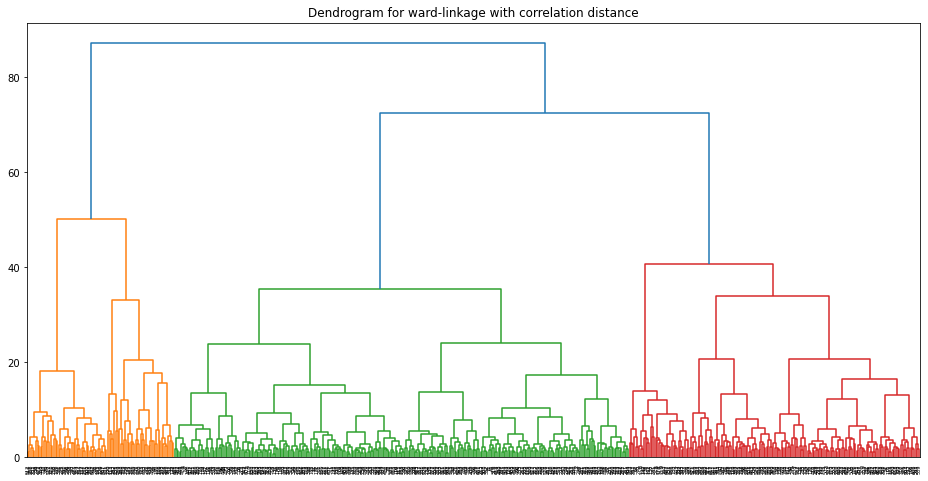

In [238]:
linkage_matrix = hierarchical_clustering(distance_matrix)

## Fall weekend days 

In [247]:
#create numpy array with mean for every hour of each ID as columns
red_df=df_fa_wknd[["Fall_ge1","day_of_year","Hour_of_Day","Electricity_Demand"]]
piv_df = pd.pivot_table(red_df,index = ["Hour_of_Day","day_of_year"],columns = "Fall_ge1",values="Electricity_Demand")
grp_df = piv_df.groupby("Hour_of_Day").mean()
cluster_df = grp_df
cluster_df

Fall_ge1,1,2,3,4,5,6,9,10,12,13,...,1360,1361,1362,1363,1364,1365,1366,1367,1370,1371
Hour_of_Day,,,,,,,,,,,,,,,,,,,,,
1,285.227273,388.869565,506.291667,166.958333,529.913043,85.64,281.92,800.857143,209.208333,1464.636364,...,155.7,170.000000,190.3,159.615385,70.454545,125.5,258.9,89.142857,157.833333,50.555556
2,224.409091,361.913043,478.750000,154.875000,399.695652,92.88,195.36,519.333333,137.791667,1396.227273,...,127.3,148.222222,180.5,159.153846,62.545455,122.6,201.3,99.000000,123.916667,37.444444
3,211.181818,325.434783,494.125000,151.666667,326.478261,80.60,154.04,477.095238,78.875000,1420.727273,...,125.2,150.555556,174.6,157.846154,63.090909,139.8,157.0,84.285714,64.583333,35.055556
4,199.454545,335.391304,482.708333,149.666667,286.956522,86.48,146.48,493.714286,87.250000,1332.227273,...,140.8,134.555556,179.7,133.538462,63.636364,130.2,169.7,92.285714,52.416667,28.777778
5,214.272727,334.173913,490.666667,150.833333,264.956522,99.80,184.28,551.809524,90.125000,1337.272727,...,157.3,112.555556,167.9,112.923077,62.000000,158.7,169.8,72.571429,75.916667,24.388889
6,308.909091,333.478261,470.125000,148.250000,265.826087,232.64,242.60,611.714286,73.750000,1401.909091,...,154.6,141.444444,215.1,121.230769,68.363636,189.6,203.7,83.857143,87.000000,24.555556
7,323.272727,354.826087,511.625000,155.166667,265.260870,348.92,280.40,594.285714,84.416667,1750.863636,...,157.4,166.222222,191.5,228.615385,101.454545,346.0,271.9,70.857143,52.916667,25.055556
8,433.772727,441.521739,489.958333,238.291667,252.434783,372.60,215.56,716.095238,117.000000,1985.227273,...,203.2,385.444444,236.4,308.000000,218.636364,327.2,338.8,137.571429,131.416667,92.888889
9,461.772727,609.130435,570.166667,444.875000,333.391304,874.44,274.84,1029.095238,259.750000,2257.590909,...,259.2,341.222222,295.2,515.769231,458.000000,299.1,421.5,238.428571,188.333333,76.611111


In [253]:
# from itertools import combinations

# [(i, j) for i,j in combinations(cluster_df, 2) if cluster_df[i].equals(df[j])]

def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(cluster_df)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows


In [250]:
#create distance matrix for the cluster algorithm
distance_matrix = cluster_df.corr()
#len(df)
#distance_matrix
#len(df) - distance_matrix.count()
distance_matrix.isnull().sum()

Fall_ge1
1       1
2       1
3       1
4       1
5       1
       ..
1365    1
1366    1
1367    1
1370    1
1371    1
Length: 547, dtype: int64

In [241]:
linkage_matrix = hierarchical_clustering(distance_matrix)

ValueError: The condensed distance matrix must contain only finite values.

##  Complete linkage

# Single linkage

In [ ]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "single")

# Average linkage

In [ ]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "average")

# Ward linkage 

In [ ]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "ward")

# Without normalization 

In [ ]:
#create numpy array with mean for every hour of each ID as columns
red_df=df[["Fall_ge1","day_of_year","Hour_of_Day","Electricity_Demand"]]
piv_df = pd.pivot_table(red_df,index = ["Hour_of_Day","day_of_year"],columns = "Fall_ge1",values="Electricity_Demand")
grp_df = piv_df.groupby("Hour_of_Day").mean()
cluster_df = grp_df
cluster_df

##  Complete linkage

In [ ]:
def hierarchical_clustering(dist_mat, method='complete'):
    if method == 'complete':
        Z = complete(distance_matrix)
    if method == 'single':
        Z = single(distance_matrix)
    if method == 'average':
        Z = average(distance_matrix)
    if method == 'ward':
        Z = ward(distance_matrix)
    
    fig = plt.figure(figsize=(16, 8))
    dn = dendrogram(Z)
    plt.title(f"Dendrogram for {method}-linkage with correlation distance")
    plt.show()
    
    return Z

linkage_matrix = hierarchical_clustering(distance_matrix)

# Single linkage

In [ ]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "single")

# Average linkage

In [ ]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "average")

# Ward linkage 

In [ ]:
linkage_matrix = hierarchical_clustering(distance_matrix, method = "ward")

In [ ]:
#I see no changes between with normalization and without, seems like the .corr() funktion works linear as well?

In [ ]:
# select maximum number of clusters
cluster_labels = fcluster(linkage_matrix, 4, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 4 unique clusters
cluster_labels = fcluster(linkage_matrix, 10, criterion='maxclust')
print(np.unique(cluster_labels))
#>> 10 unique clusters

# hand-select an appropriate cut-off on the dendrogram
cluster_labels = fcluster(linkage_matrix,12 , criterion='distance')
print(np.unique(cluster_labels))
#>> 3 unique clusters
cluster_labels = fcluster(linkage_matrix, 10, criterion='distance')
print(np.unique(cluster_labels))
#>> 2 unique clusters